# Coursework 1 Image Processing

## Part 1 - Thresholding:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

**a) Convert the image to a grey image**

In [2]:
def toGraySwap(img):
    gray_img = 1 - img[:,:,0]*0.299 - img[:,:,1]*0.587 - img[:,:,2]*0.114;
    return gray_img
def toGray(img):
    gray_img = img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.114;
    return gray_img

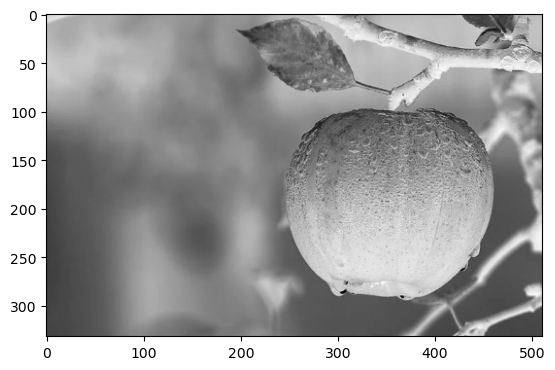

In [3]:
img = mpimg.imread('./images/source.png');
gray_img = toGraySwap(img);
gray_img_plot = plt.imshow(gray_img,'gray');
plt.show();

**b) Implement a function to threshold the image by a treshold value t.**

In [4]:
def threshold(img,t):
    n,m = img.shape;
    threshold_img = img.copy();
    t1 = t/255;
    for i in range(n):
        for j in range(m):
            threshold_img[i,j] = (img[i,j] >= t1);
    return threshold_img;

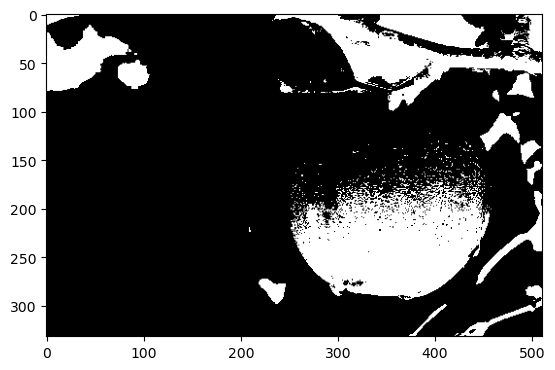

In [5]:
threshold_img = threshold(gray_img,173);
threshold_plot = plt.imshow(threshold_img,'gray');
plt.show();

**c) Plot the ROC curve of that method under varying t**

I am using the toGraySwap, because otherwise the ROC would be below the bisector, this means we need to use thresholding for the inverted image.

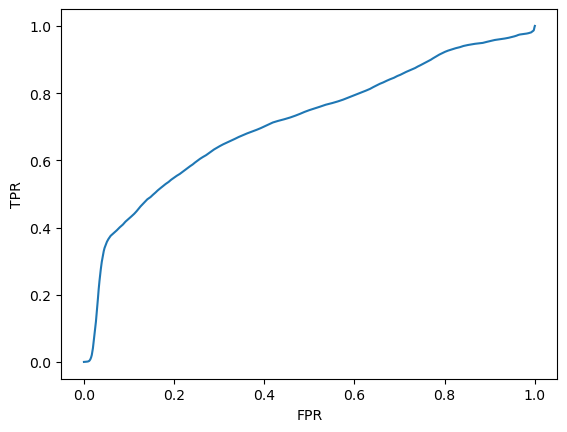

In [6]:
threshold_target_image_original = mpimg.imread('./images/target.png');
threshold_target_image = toGray(threshold_target_image_original);
threshold_target_image = threshold(threshold_target_image,127.5);
#threshold_target_image = 1 - threshold_target_image;
n,m = threshold_target_image.shape;
P=0;
N=0;
for i in range(n):
    for j in range(m):
        if(threshold_target_image[i,j] == 1):
            P=P+1;
        else:
            N=N+1;
TPR=np.zeros(256);
FPR=np.zeros(256);
FScore=np.zeros(256);
for threshold_param in range(256):
    threshold_image = threshold(gray_img,threshold_param);
    #threshold_image = 1-threshold_image;
    P1=0;
    N1=0;
    TP=0;
    FP=0;
    FN=0;
    TN=0;
    for i in range(n):
        for j in range(m):
            if(threshold_image[i,j] == 1):
                P1=P1+1;
            else:
                N1=N1+1;
            if(threshold_image[i,j] == 1 and threshold_target_image[i,j] == 1):
                TP=TP+1;
            elif(threshold_image[i,j] == 1 and threshold_target_image[i,j] == 0):
                FP=FP+1;
            elif(threshold_image[i,j] == 0 and threshold_target_image[i,j] == 1):
                FN=FN+1;
            else:
                TN=TN+1;
    TPR[threshold_param]=TP/P;
    FPR[threshold_param]=FP/N;
    FScore[threshold_param]=2*TP/(2*TP+FP+FN)
plt.plot(FPR,TPR);
plt.xlabel('FPR');
plt.ylabel('TPR');
plt.show();
                

**d) Save this as an image**

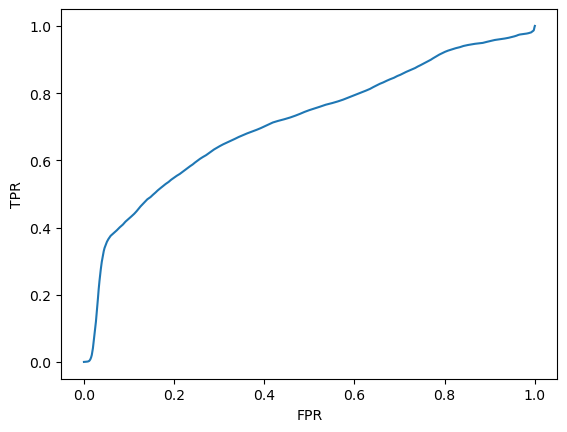

In [7]:
plt.plot(FPR,TPR);
plt.xlabel('FPR');
plt.ylabel('TPR');
plt.savefig('./images/ROC.png');

**e) What is the optimal threshold t, if precision and recall are weighted equally?**

In [8]:
maxScore = 0;
maxThreshold = -1;
for index,element in enumerate(FScore):
    if(element>maxScore):
        maxScore=element;
        maxThreshold=index;
print(maxThreshold);

173


I got 173 as the optimal threshold.

**f) Is there a better linear method to convert the RGB into the gray image, so that the sweep results in a better result?**

We can improve the accuracy of the threshold sweep, by modifying the method of converting the RGB into the grey image. Instead of using certain weights for the three channels, we construct our image such that the apple tends to be white, and the rest of the image black. In order to do that, we apply a red filter(the apple is red-ish). The red filter is 2\*R-G-B. we then need to adjust the intensity of pixels to be between 0 and 1. 

In [6]:
def red_filter(img):
    red_img = 2 * img[:,:,0] - img[:,:,1] - img[:,:,2];
    red_img *= 1.0/img.max()
    return red_img

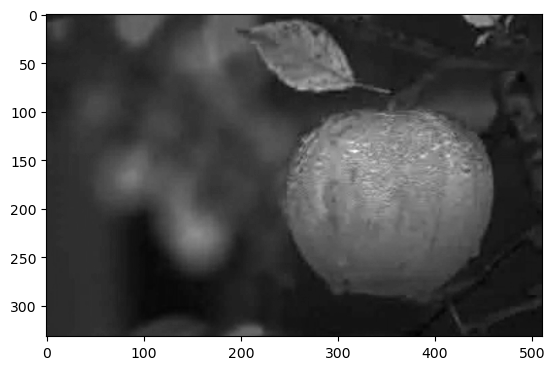

In [10]:
img = mpimg.imread('./images/source.png');
red_img = red_filter(img);
red_img_plot = plt.imshow(red_img,'gray');
plt.show();

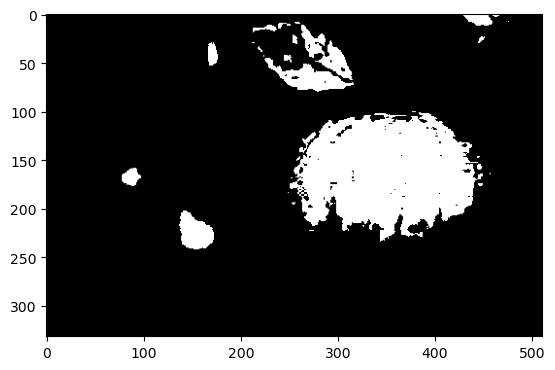

In [15]:
threshold_img = threshold(red_img,110);
threshold_plot = plt.imshow(threshold_img,'gray');
plt.show();

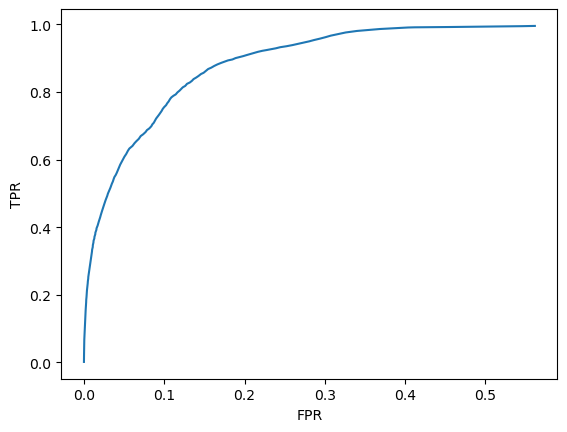

In [11]:
threshold_target_image_original = mpimg.imread('./images/target.png');
threshold_target_image = toGray(threshold_target_image_original);
threshold_target_image = threshold(threshold_target_image,127.5);
#threshold_target_image = 1 - threshold_target_image;
n,m = threshold_target_image.shape;
P=0;
N=0;
for i in range(n):
    for j in range(m):
        if(threshold_target_image[i,j] == 1):
            P=P+1;
        else:
            N=N+1;
TPR=np.zeros(256);
FPR=np.zeros(256);
FScore=np.zeros(256);
for threshold_param in range(256):
    threshold_image = threshold(red_img,threshold_param);
    #threshold_image = 1-threshold_image;
    P1=0;
    N1=0;
    TP=0;
    FP=0;
    FN=0;
    TN=0;
    for i in range(n):
        for j in range(m):
            if(threshold_image[i,j] == 1):
                P1=P1+1;
            else:
                N1=N1+1;
            if(threshold_image[i,j] == 1 and threshold_target_image[i,j] == 1):
                TP=TP+1;
            elif(threshold_image[i,j] == 1 and threshold_target_image[i,j] == 0):
                FP=FP+1;
            elif(threshold_image[i,j] == 0 and threshold_target_image[i,j] == 1):
                FN=FN+1;
            else:
                TN=TN+1;
    TPR[threshold_param]=TP/P;
    FPR[threshold_param]=FP/N;
    FScore[threshold_param]=2*TP/(2*TP+FP+FN)
plt.plot(FPR,TPR);
plt.xlabel('FPR');
plt.ylabel('TPR');
plt.show();

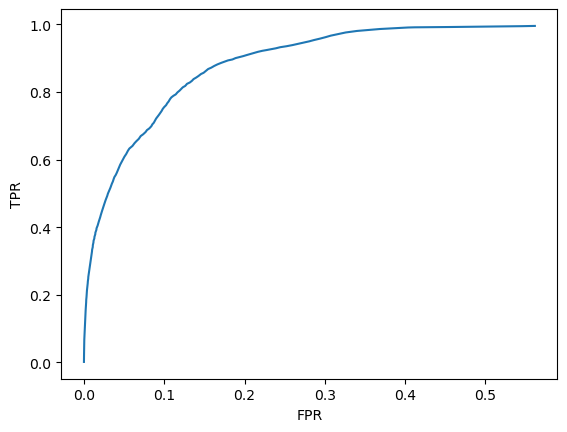

In [12]:
plt.plot(FPR,TPR);
plt.xlabel('FPR');
plt.ylabel('TPR');
plt.savefig('./images/ROC_improved.png');

## Part 2 - Clustering:

**a) Implement a function to segment the image using k-means using only color.**

In [2]:
def kmeans(X, k, max_iterations=100):
    # we initialize the centroids as the average of already existing points, we split them in groups of approximately the same size
    n,m = X.shape;
    average_centroids_size = n//k ;
    centroids = np.zeros([k,m]);
    for i in range(k-1):
        for j in range(average_centroids_size):
            element = X[i*average_centroids_size+j];
            centroids[i] = centroids[i] + element;
        centroids[i] = centroids[i]/average_centroids_size;
    nr=0;
    for t in range(i*average_centroids_size+j+1,n):     
        nr = nr + 1;
        element = X[t];
        centroids[k-1] = centroids[k-1] + element;
    centroids[k-1] = centroids[k-1]/nr;
#     for i in range(k):
#         centroids[i,0]=np.random.rand();
#         centroids[i,1]=np.random.rand();
#         centroids[i,2]=np.random.rand();
    # we start to apply the algorithm
    old_assignment = np.zeros([n]);
    for iteration in range(max_iterations):
        #print(iteration);
        new_centroids = np.zeros([k,m]);
        nr_elements = np.zeros([k]);
        assignment = np.zeros([n]);
        #for each data point, we search the centroid that is closest to it, and we asign that centroid to that data point
        #we also calculate new centroids, as the average of all the data points that have been assigned to it
        for element in range(n):
            min_centroid = 0;
            minimum = np.linalg.norm((X[element]-centroids[0]),2);
            for t in range(1,k):
                dif = np.linalg.norm((X[element]-centroids[t]),2) ;
                if(dif<minimum):
                    minimum = dif;
                    min_centroid = t;
            new_centroids[min_centroid] = new_centroids[min_centroid] + X[element];
            nr_elements[min_centroid] = nr_elements[min_centroid] + 1;
            assignment[element] = min_centroid;
        for t in range(k):
            if(nr_elements[t]):
                centroids[t] = new_centroids[t] / nr_elements[t];
        if(np.array_equal(old_assignment,assignment)):
            iteration=100;
        old_assignment=assignment;
    #end_solution
    return centroids,assignment;

In [3]:
def kmeansColor(img,k,max_iterations = 100):
    n,m,t = img.shape;
    img = img[:,:,:3];
    img_as_vector = img.reshape(-1,img.shape[-1]);
    centroids,assignment = kmeans(img_as_vector,k,max_iterations);
    assignment = assignment.reshape(n,m);
    clustered_image = np.zeros([n,m,3])
    for i in range(n):
        for j in range(m):
            clustered_image[i,j] = centroids[int(assignment[i,j])];
#             if(assignment[i,j]==0):
#                 clustered_image[i,j,0] = 1;
#                 clustered_image[i,j,1] = 0;            
#                 clustered_image[i,j,2] = 0; 
#             elif(assignment[i,j]==1):
#                 clustered_image[i,j,0] = 0;
#                 clustered_image[i,j,1] = 1;            
#                 clustered_image[i,j,2] = 0; 
#             elif(assignment[i,j]==2):
#                 clustered_image[i,j,0] = 0;
#                 clustered_image[i,j,1] = 0;            
#                 clustered_image[i,j,2] = 1;
#             else:
#                 clustered_image[i,j,0] = 0.5;
#                 clustered_image[i,j,1] = 0.5;            
#                 clustered_image[i,j,2] = 0.5;
    return clustered_image

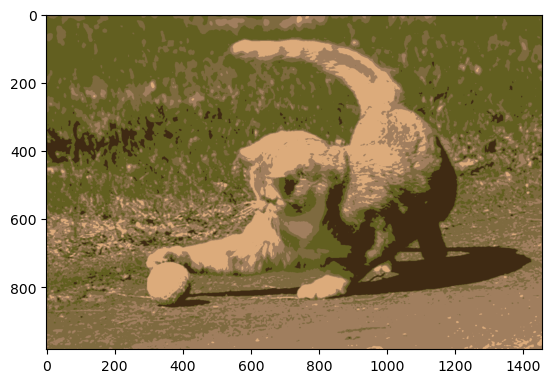

In [4]:
clustering_img = mpimg.imread('./images/clustering.png');
clustered_image = kmeansColor(clustering_img,5,10);    
clustered_plot = plt.imshow(clustered_image,'gray');
plt.savefig('./images/kmeans_5_clusters_color.png');
plt.show();

**b) Implement a function to segment the image using k-means using color and position.**

Note that since the RGB values are between 0-1, I am transforming the coordinates to the 0-1 space as well.

In [5]:
def kmeansColorAndPosition(img,k,max_iterations=100):
    n,m,t = img.shape;
    img = clustering_img[:,:,:3];
    img_with_position = np.zeros([n,m,5]);
    for i in range(n):
        for j in range(m):
            list1 = img[i,j];
            list2 = [list1[0],list1[1],list1[2],i/n,j/m];
            img_with_position[i,j]=list2;
    img_with_position_as_vector = img_with_position.reshape(-1,img_with_position.shape[-1]);
    centroids,assignment = kmeans(img_with_position_as_vector,k,max_iterations);
    assignment = assignment.reshape(n,m);
    clustered_image = np.zeros([n,m,3]);
    for i in range(n):
        for j in range(m):
            clustered_image[i,j] = centroids[int(assignment[i,j]),:3];
#             if(assignment[i,j]==0):
#                 clustered_image[i,j,0] = 1;
#                 clustered_image[i,j,1] = 0;            
#                 clustered_image[i,j,2] = 0; 
#             elif(assignment[i,j]==1):
#                 clustered_image[i,j,0] = 0;
#                 clustered_image[i,j,1] = 1;            
#                 clustered_image[i,j,2] = 0; 
#             elif(assignment[i,j]==2):
#                 clustered_image[i,j,0] = 0;
#                 clustered_image[i,j,1] = 0;            
#                 clustered_image[i,j,2] = 1;
#             else:
#                 clustered_image[i,j,0] = 0.5;
#                 clustered_image[i,j,1] = 0.5;            
#                 clustered_image[i,j,2] = 0.5;
    return clustered_image;

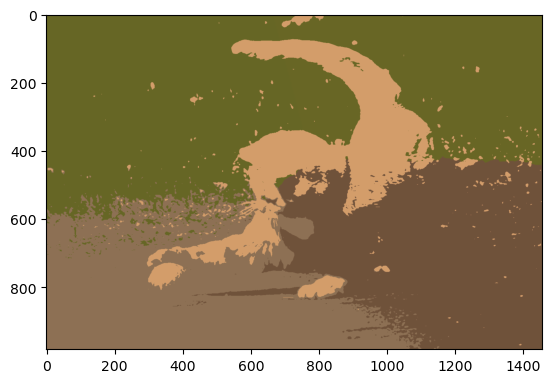

In [6]:
clustering_img = mpimg.imread('./images/clustering.png');
clustered_image_position = kmeansColorAndPosition(clustering_img,5,10);
clustered_position_plot = plt.imshow(clustered_image_position,'gray');
plt.savefig('./images/kmeans_15_clusters_color_and_position.png');
plt.show();

**c) Implement a method to L2 comparte the input image and its clustered version**

In [18]:
def compare(img,clustered_image):
    return np.linalg.norm(img[:,:,:3].flatten()-clustered_image.flatten(), 2);

In [19]:
error = compare(clustering_img,clustered_image_position);
print(error);

140.71537292675168


**d) Plot two error curves for varying k for both the color and color-and-position version of the algorithm**

Running 2 kmeans methods for an image of high resolution, for 18 different values of k, for 10 epochs takes a while. I ran this and saved the results in the images folder, as pngs.

In [20]:
color_error = np.zeros(20);
color_and_position_error = np.zeros(20);
for clusters in range(2,20):
    clustered_image = kmeansColor(clustering_img,clusters,10);
    color_error[clusters]=compare(clustering_img,clustered_image);
    clustered_image = kmeansColorAndPosition(clustering_img,clusters,10);
    color_and_position_error[clusters] = compare(clustering_img,clustered_image);

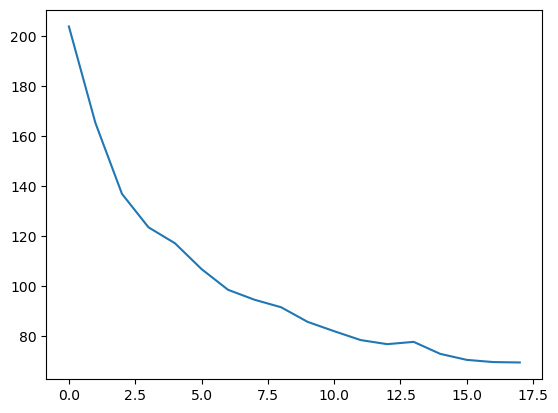

In [21]:
plt.plot(color_error[2:]);
plt.savefig('./images/kmeans_2_to_20_clusters_L2error_color.png');
plt.show();

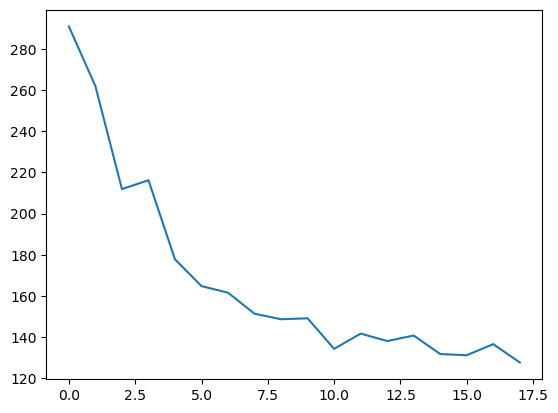

In [22]:
plt.plot(color_and_position_error[2:]);
plt.savefig('./images/kmeans_2_to_20_clusters_L2error_color_and_position.png');
plt.show();